In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, mean_squared_error, r2_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt
from scipy.stats import ks_2samp
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier

In [2]:
import scipy
print(scipy.__version__)

1.11.4


In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
phishData = pd.read_csv("./PhishingData.csv")
phishData.loc[:, "EmailType"] = 1  #Phish Email
phishData

,Index,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text,Lang,EmailType
0,<000cab25-bb13-4475-bc2c-f4d6433e02e9@VI1EUR0...,0,0,0,0,0,0,1,0,3,0,1,0,Test Your Luck Today could be your lucky da...,en,1
1,<0093aa41-b6e9-407c-a7ba-8e09e54b9259@MW2NAM1...,0,0,0,0,0,0,1,0,0,0,4,0,Microsoft account Unusual sign in activity ...,en,1
2,<010001873de042bd-26b4aa2f-4df1-47eb-8ec3-21a...,0,0,0,0,0,0,0,0,0,0,0,0,Don t miss your chance to claim your BLUR ...,en,1
3,<0107018b45a7b187-4598658e-7003-4489-9e37-98e...,0,0,0,0,0,0,0,0,0,0,0,0,Claim your airdrop ...,en,1
4,<0108018b0ba35476-34fe8957-ef09-43dd-bf6d-44b...,0,0,0,0,0,0,0,0,0,0,0,0,Claim your airdrop ...,en,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,I2,0,0,0,0,0,0,0,0,0,0,2,0,Hello Friend How are you and your family...,en,1
1976,I4,0,0,0,0,0,0,1,0,0,0,9,0,Hey phishing pot I have to share bad news wi...,en,1
1977,I6,0,0,0,0,0,0,1,0,2,0,1,1,Hi i write u along time How are u ...,en,1
1978,KsXJIQrY123318_J4b6I86d2vf2E6801xT.4H7f533832C...,0,0,0,0,0,1,1,0,1,0,0,1,Special Offer Enjoy a Discount on Your Nex...,en,1


In [3]:
#phishData[["DKIM",'SPF','DMARC','ARC']] = 1
phishData.head(10)

,Index,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text,Lang,EmailType
0,<000cab25-bb13-4475-bc2c-f4d6433e02e9@VI1EUR0...,1,1,1,1,0,0,1,0,3,0,1,0,Test Your Luck Today could be your lucky da...,en,1
1,<0093aa41-b6e9-407c-a7ba-8e09e54b9259@MW2NAM1...,1,1,1,1,0,0,1,0,0,0,4,0,Microsoft account Unusual sign in activity ...,en,1
2,<010001873de042bd-26b4aa2f-4df1-47eb-8ec3-21a...,1,1,1,1,0,0,0,0,0,0,0,0,Don t miss your chance to claim your BLUR ...,en,1
3,<0107018b45a7b187-4598658e-7003-4489-9e37-98e...,1,1,1,1,0,0,0,0,0,0,0,0,Claim your airdrop ...,en,1
4,<0108018b0ba35476-34fe8957-ef09-43dd-bf6d-44b...,1,1,1,1,0,0,0,0,0,0,0,0,Claim your airdrop ...,en,1
5,<0133b796-ea8a-4aca-9964-69eb1e642c33@VI1EUR0...,1,1,1,1,0,0,1,0,4,0,3,0,Facebook Hi phishing pot Someone tried to...,en,1
6,<014206a1-aacc-4140-99d4-a0e2f7204f59@BN8NAM0...,1,1,1,1,0,0,1,0,0,0,4,0,Microsoft account Unusual sign in activity ...,en,1
7,<019cfd04-5bf6-4013-828e-14e2a359cf44@VI1EUR0...,1,1,1,1,0,0,1,0,11,0,5,0,The Few Minutes CouId SaveYou Hundreds Mail ac...,en,1
8,<01b046e7-624f-4fac-a212-16aa7576a019@VI1EUR0...,1,1,1,1,0,0,1,0,0,0,4,0,Microsoft account Unusual sign in activity ...,en,1
9,<023baf3e-2807-43e6-9bf1-d4ab00d50c5a@HE1EUR0...,1,1,1,1,0,0,1,0,11,0,5,0,The Few Minutes CouId SaveYou Hundreds Mail ac...,en,1


In [5]:
hamData = pd.read_csv("./HamData2.csv")
hamData.loc[:, "EmailType"] = 0  #Ham Email
hamData[["DKIM",'SPF','DMARC','ARC']] = 1

In [6]:
allData = hamData.merge(phishData, how="outer")
#allData

In [7]:
def stemming(emailText: str) -> str:
    stopWords = set(nltk.corpus.stopwords.words('english'))
    wordTokens = nltk.word_tokenize(emailText)
    filteredEmailText = [word for word in wordTokens if not word.lower() in stopWords]
    filteredEmailText = ' '.join(filteredEmailText)
    return filteredEmailText

In [8]:
allData.loc[:, "Text"] = allData.loc[:, "Text"].apply(stemming)
allData

MemoryError: 

In [9]:
X = allData.iloc[:,1:-1]
Y = allData["EmailType"]

In [10]:
X

,Unnamed: 0,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text,Lang
0,NaN,0,0,0,0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,Test Your Luck Today could be your lucky da...,en
1,NaN,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,Microsoft account Unusual sign in activity ...,en
2,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Don t miss your chance to claim your BLUR ...,en
3,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Claim your airdrop ...,en
4,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Claim your airdrop ...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510699,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Hello Friend How are you and your family...,en
510700,NaN,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,Hey phishing pot I have to share bad news wi...,en
510701,NaN,0,0,0,0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,Hi i write u along time How are u ...,en
510702,NaN,0,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,Special Offer Enjoy a Discount on Your Nex...,en


In [31]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
4756    1
4757    1
4758    1
4759    1
4760    1
Name: EmailType, Length: 4761, dtype: int64


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  #random selection on each run and a split of 80:20 for the train:test data
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(510704, 15)
(408563, 15)
(102141, 15)


In [33]:
X_train

,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text,Lang
1786,0,0,0,0,0,0,0,0,0,0,0,0,Forwarded Nev Dull nev sleepycat com Forwarded...,en
3095,0,0,0,0,0,0,0,0,0,0,0,0,Adam L Beberg wrote Fair use needs clarified b...,en
1705,0,0,0,0,0,0,0,0,0,0,0,0,RPMS http www dudex net rpms could useful one ...,en
1402,0,0,0,0,0,0,0,0,0,0,0,0,frequency laptop disk chirps indication say ha...,en
1896,0,0,0,0,0,0,0,0,0,0,0,0,Thanks Brent clearer needed used global sort J...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1,1,1,1,0,0,1,0,4,0,3,0,Netflix account suspended Please Update Paymen...,en
466,1,1,1,1,0,0,0,0,0,0,1,0,order shipped soon feasible processed item ite...,en
3092,0,0,0,0,0,0,0,0,0,0,0,0,Doom based peer peer architecture says CmdrTac...,en
3772,0,0,0,0,0,0,0,0,0,0,1,0,use Perl Daily Headline Mailer Week perl porte...,en


In [12]:
def applyFeatureAndFit(value):
    return featureExtraction.fit_transform([value])

In [13]:
def applyFeature(value):
    return featureExtraction.transform([value])

In [125]:
featureExtraction = TfidfVectorizer(max_features=500, min_df=5, max_df=0.7)
featuresTrain = featureExtraction.fit_transform(X_train["Text"])
featuresTrainArray = featuresTrain.toarray()
X_train_tfidf_df = pd.DataFrame(featuresTrainArray, columns=featureExtraction.get_feature_names_out(), index=X_train.index)
X_train_combined = pd.concat([X_train, X_train_tfidf_df], axis=1)
X_train_combined = X_train_combined.drop(['Lang','Text'], axis=1)



In [126]:
X_train_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3332 entries, 1786 to 860
Columns: 112 entries, DKIM to www
dtypes: float64(100), int64(12)
memory usage: 2.9 MB


In [127]:
featuresTest = featureExtraction.transform(X_test["Text"])
featuresTestArray = featuresTest.toarray()
X_test_tfidf_df = pd.DataFrame(featuresTestArray, columns=featureExtraction.get_feature_names_out(), index=X_test.index)
X_test_combined = pd.concat([X_test, X_test_tfidf_df], axis=1)
X_test_combined = X_test_combined.drop(['Lang','Text'], axis=1)

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [39]:
Z_train = X_train.iloc[:,:-1]
W = pd.DataFrame(X_train.Text.values.tolist(), index=X_train.index)
W

,0
1786,Forwarded Nev Dull nev sleepycat com Forwarded...
3095,Adam L Beberg wrote Fair use needs clarified b...
1705,RPMS http www dudex net rpms could useful one ...
1402,frequency laptop disk chirps indication say ha...
1896,Thanks Brent clearer needed used global sort J...
...,...
4426,Netflix account suspended Please Update Paymen...
466,order shipped soon feasible processed item ite...
3092,Doom based peer peer architecture says CmdrTac...
3772,use Perl Daily Headline Mailer Week perl porte...


In [40]:
X_test.head(5)

,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text,Lang
2314,0,0,0,0,0,0,0,0,0,0,1,0,URL http www newsisfree com click Date Doc Brown,en
315,1,1,1,1,0,0,1,0,4,0,8,0,Mach mit beim Spa Bitte schau dir mein Profil ...,en
2329,0,0,0,0,0,0,0,0,0,0,1,0,URL http www newsisfree com click Date Society...,en
472,1,1,1,1,0,0,0,0,0,0,1,1,belowView margin top px Adjust value needed He...,en
534,1,1,1,1,0,0,0,0,0,0,0,0,De Miss Altynay lienhe stb com vn Enviado sext...,en


In [88]:
X_train_combined = X_train.drop(['Lang','Text'], axis=1)
X_test_combined = X_test.drop(['Lang','Text'], axis=1)

In [146]:
counts = Y_train.value_counts()
counts

EmailType
0    1948
1    1384
Name: count, dtype: int64

In [128]:
model = LogisticRegression()
model.fit(X_train_combined, Y_train)

LogisticRegression()

In [129]:
predictionTrainingData = model.predict(X_train_combined)
accOnTrainingData = accuracy_score(Y_train, predictionTrainingData) 

In [130]:
print(accOnTrainingData)

1.0


In [131]:
predictionTestData = model.predict(X_test_combined)
accOnTestData = accuracy_score(Y_test, predictionTestData)
precisionTestData = precision_score(Y_test, predictionTestData)
recallTestData = recall_score(Y_test, predictionTestData)
f1TestData = f1_score(Y_test, predictionTestData)
print(f'Accuracy: {accOnTestData}')
print(f'Precision: {precisionTestData}')
print(f'Recall: {recallTestData}')
print(f'F1 Score: {f1TestData}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [110]:
mse = mean_squared_error(y_true=Y_test, y_pred=predictionTestData)
r2 = r2_score(y_true=Y_test, y_pred=predictionTestData)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 0.0
R2: 1.0


In [111]:
Y_predProb = model.predict_proba(X_test_combined)
print(Y_predProb)

[[9.98884841e-01 1.11515866e-03]
 [9.12083827e-05 9.99908792e-01]
 [9.98787102e-01 1.21289837e-03]
 ...
 [5.74733405e-06 9.99994253e-01]
 [9.98935537e-01 1.06446328e-03]
 [9.98768244e-01 1.23175616e-03]]


In [112]:
auc = roc_auc_score(Y_test, Y_predProb[:,1])
print(f'AUC: {auc}')

AUC: 0.9999999999999999


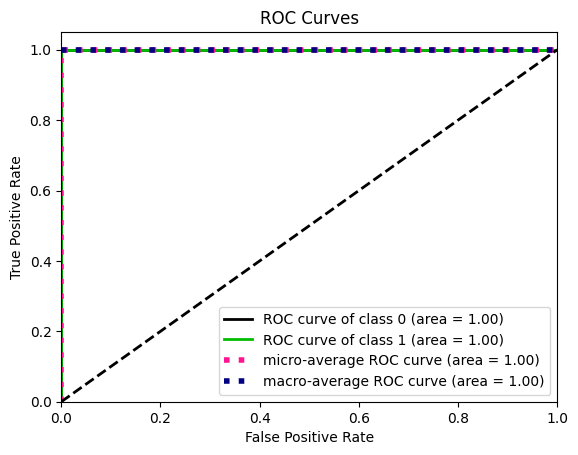

In [113]:
skplt.metrics.plot_roc(Y_test, Y_predProb)
plt.show()

In [114]:
def evaluate_ks(y_real, y_proba):
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    ks = ks_2samp(class0['proba'], class1['proba'])
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    
evaluate_ks(Y_test, Y_predProb)

KS: 1.0000 (p-value: 0.000e+00)


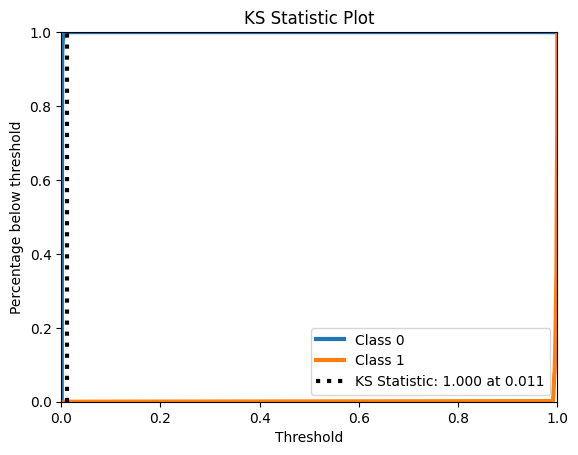

In [115]:
skplt.metrics.plot_ks_statistic(Y_test, Y_predProb)
plt.show()

In [27]:
print(featuresTest)

  (4, 2314)	1.0
  (7, 954)	1.0
  (8, 473)	0.2581988897471611
  (8, 1239)	0.5163977794943222
  (8, 1570)	0.2581988897471611
  (8, 2481)	0.5163977794943222
  (8, 2587)	0.5163977794943222
  (8, 2655)	0.2581988897471611
  (15, 235)	0.8574929257125442
  (15, 518)	0.5144957554275265
  (18, 1377)	0.5547001962252291
  (18, 2425)	0.8320502943378437
  (20, 664)	1.0
  (29, 2620)	1.0
  (32, 2703)	1.0
  (34, 2513)	1.0
  (43, 1084)	0.5547001962252291
  (43, 2957)	0.8320502943378437
  (48, 625)	0.7071067811865476
  (48, 1917)	0.7071067811865476
  (75, 1693)	1.0
  (80, 1249)	1.0
  (94, 1214)	1.0
  (100, 2620)	1.0
  (106, 2238)	1.0
  :	:
  (1250, 413)	1.0
  (1260, 1245)	1.0
  (1261, 1893)	0.7071067811865476
  (1261, 2671)	0.7071067811865476
  (1265, 1714)	1.0
  (1266, 238)	1.0
  (1289, 205)	0.8728715609439696
  (1289, 320)	0.2182178902359924
  (1289, 2013)	0.4364357804719848
  (1299, 2124)	1.0
  (1305, 904)	1.0
  (1319, 928)	1.0
  (1321, 2620)	1.0
  (1327, 70)	1.0
  (1330, 353)	1.0
  (1332, 903)	0.8944

In [116]:
joblib.dump(featureExtraction, "./Tfidf_Vectorizer2.pkl")

['./Tfidf_Vectorizer2.pkl']

In [117]:
joblib.dump(model, "./LogisticRegression.pkl")

['./LogisticRegression.pkl']

In [14]:
X_train2 = X_train.drop(['Lang'], axis=1)
X_train2

,Unnamed: 0,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text
501761,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,hacker (HACK-uhr) noun\n\n 1. A person who e...
226762,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Oh you're listed alright. I found you in the ...
188925,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EFF_DT PORTFOLIO_ID DOWN95\n1/19/01 MANAGEMEN...
437025,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I have someone that works for me that's applie...
485192,0.0,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,"Mark,\n\nSee message below, just in from Susan..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"As required by the Houston Fire Department, a ..."
365838,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"As Enron reaches new highs (82), I hope you to..."
131932,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Frank:\n\nWe have recently rethought our treat...
146867,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,"If you cannot read this email, please click he..."


In [15]:
X_test2 = X_test.drop(['Lang'], axis=1)
X_test2

,Unnamed: 0,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text
500783,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,BUSINESS HIGHLIGHTS\r\n\r\nWeather Group\r\n\r...
121202,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,"Michelle:\n\nAfter I sent you my prior emails,..."
277678,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Following please find the Daily EnronOnline Ex...
365248,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"John,\nI have not heard from Rick on this draf..."
29866,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,\n[IMAGE] \t\n\n\n [IMAGE] [IMAGE]Explor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225909,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Hello guys,\n\nI'm ""bugging you"" for your comp..."
206557,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,"I have to admit, I don't remember our having d..."
470093,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"Debra,\nThank you for sending your GISB agreem..."
202251,0.0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,---------------------- Forwarded by Vince J Ka...


In [179]:
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self
    def transform(self, X, y=None, **fit_params):
        return X.toarray()

In [16]:

preprocessor = ColumnTransformer(
    transformers=[
        ('Text', TfidfVectorizer(max_features=500, min_df=5, max_df=0.7), 'Text')
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression()),
])

pipeline.fit(X_train2, Y_train)

y_pred = pipeline.predict(X_test2)

acc = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print(f'Accuracy: {acc}')
print(f'Classification Report:\n{report}')

MemoryError: 

In [199]:
mode = RandomForestClassifier(n_estimators=10)
mode.fit(X_train2, Y_train)
y_pred = mode.predict(X_test2)
acc = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'Classification Report:\n{report}')

Accuracy: 0.993704092339979
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       551
           1       0.99      0.99      0.99       402

    accuracy                           0.99       953
   macro avg       0.99      0.99      0.99       953
weighted avg       0.99      0.99      0.99       953

